In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import math
%matplotlib inline
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("paper")

plt.rc('figure', figsize=(6,3))
plt.rc('figure.subplot', wspace=.33)

##  Problema 4

Si X es N(5,4), encontrar el valor de c tal que:

a) P(X < c) = 0.8749

b) P(c < X) = 0.6406

c) P( X < c) = 0.95

Rpta: a) 1.15; b) –0.36; c) 1.645

Sabiendo que la distribucion normal es

$$
P(x) = \frac{1}{\sigma \sqrt{2\pi} }e^{- (x - \mu)^2 / 2\sigma^2 }
$$

La primera probabilidad

$$
P(X < c) = \int_{-\infty}^c \frac{1}{\sigma \sqrt{2\pi} }e^{- (x - \mu)^2 / 2\sigma^2 } dx
$$

Se transforma a la dist. normal estandar x q la integral no es facil de resolver. Se define lo que se conoce como z-score o "z".

$$
\begin{aligned}
z &= (x - \mu) / \sigma \\
x &= \mu + \sigma z \\
dx &= \sigma dz
\end{aligned}
$$

$$
P(X < c) = \int_{-\infty}^c \frac{1}{\sqrt{2\pi} }e^{- z^2 / 2\sigma^2 } dz
$$

Esta distribucion claramente es la distribucion normal estandar. Solo se hace un cambio de variable. Y resulta la "Función Estándar de Distribución Normal"

$$
\phi(z) = P(Z < z) = \int_{-\infty}^z \frac{1}{\sqrt{2\pi} }e^{- w^2 / 2\sigma^2 } dw
$$

La salida de esta funcion es bien conocida, se utilizaba la tabla z.

Entonces para transformar una distribucion a la otra.

Solo hace falta recordar
 
$$
\begin{aligned}
P(X < c) =& P(Z < z)\\
         =& P\Big(Z < \Big(\frac{c - \mu}{\sigma}\Big)\Big)
\end{aligned}
$$

**a) P(X < c) = 0.8749**

$$
\begin{aligned}
N(\mu, \sigma^2) \\
\mu = 5 \\
\sigma^2 = 4
\end{aligned}
$$

Pide calcular c

$$
\begin{aligned}
P(X < c) =& 0.8749 \\
         =& P(Z < z) \\
         =& P\Big(Z < \Big(\frac{c - 5}{2}\Big)\Big)
\end{aligned}
$$

In [2]:
from scipy.stats import norm
# percent point function
z = norm.ppf(0.8749)
print("z = {}".format(z))

z = 1.1498637337452084


In [3]:
c = 2 * z + 5
c

7.2997274674904169

Que es lo mismo que

In [4]:
norm.ppf(.8749, loc=5, scale=2)

7.2997274674904169

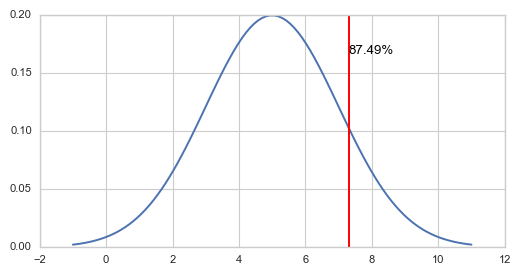

In [5]:
def plot_bell(mu, sigma, area):
    x_sep_left = norm.ppf(area, mu, sigma)
    left = mu - 3*sigma
    right = mu + 3*sigma

    x = np.linspace(left, right, 100)
    y = norm.pdf(x, mu, sigma)

    plt.figure()
    plt.plot(x, y)

    x_fill_left = np.linspace(left, x_sep_left, 100)
    plt.axvline(x_sep_left, color='r')
    plt.text(x=x_sep_left, y=max(y)/1.2, s="{}%".format(round(100*area, 2)), color='black')
    
plot_bell(5, 2, .8749)

**b) P(c < X) = 0.6406**

$$
\begin{aligned}
P(c < X) =& 1 - P(X < c) \\
=& 1 - P(Z < z) \\
=& 1 - P(Z < (c - 5) / 2) \\
0.6406 =& 1 - P(Z < (c - 5) / 2) \\
0.3594 =& P(Z < (c - 5) / 2) \\
\end{aligned}
$$

In [6]:
z = norm.ppf(0.3594)
print("z = {}".format(z))

z = -0.3600630285663343


In [7]:
c = 2 * z + 5
c

4.2798739428673311

**b) P(X < c) = 0.95**

In [8]:
z = norm.ppf(0.95)
print("z = {}".format(z))

z = 1.6448536269514722


In [9]:
c = 2 * z + 5
c

8.2897072539029448

##  Problema 7

Supóngase que las especificaciones del diámetro de un eje de motor son 0.25 +- 0.002 pulgadas. Si la
producción de estos ejes esta distribuida normalmente con μ = 0.251 pulg. y sigma = 0.001 pulg. Qué porcentaje
de los ejes se encuentran dentro de las especificaciones?

Rpta.: 84 %

$X \sim N(0.251, 0.001^2)$

$P(0.25 - 0.002 < x < 0.25 + 0.002) = \phi((0.25 + 0.002 - 0.251)/0.001) - \phi((0.25 - 0.002 - 0.251)/0.001)$

In [10]:
phi_1 = norm.cdf((0.25 + 0.002 - 0.251)/0.001)
print("phi_1 = {}".format(phi_1))

phi_1 = 0.8413447460685431


In [11]:
phi_2 = norm.cdf((0.25 - 0.002 - 0.251)/0.001)
print("phi_2 = {}".format(phi_2))

phi_2 = 0.0013498980316300813


In [12]:
phi_1 - phi_2

0.83999484803691304

##  Problema 9

Una máquina llena bolsas con cemento a 100 libras. El peso que se pone en cada bolsa es una variable
aleatoria con sigma = 0.5 lbs. El promedio de la distribución puede ser fijado por el operador. A que peso
promedio debe ser fijada la máquina para que solo 5 % de las bolsas estén bajo el peso especificado?

Rpta.: 100.823

In [13]:
sigma = 0.5
mu = 100

$$
\begin{aligned}
P(x < 100) =& 0.05 \\
=& P(Z < (100 - \mu)/\sigma) \\
\end{aligned}
$$

In [14]:
z = norm.ppf(0.05)
z

-1.6448536269514729

$$
\begin{aligned}
z =& (100 - \mu) / \sigma \\
z * \sigma =& 100 - \mu \\
\mu =& 100 - z * \sigma
\end{aligned}
$$

In [15]:
100 - z * sigma

100.82242681347573

##  Problema 12

El espesor de placas metálicas es una variable de interés. Debido a muchos factores, tales como variaciones
en las características del metal, diferentes operarios y diferentes máquinas, el espesor varía y puede ser
considerado como una variable aleatoria con μ = 20 mm y sigma = 0.04 mm. Cuánto de placas de desecho se
puede esperar si el espesor :

**a) Tiene que ser por lo menos 19.95 mm?**

Rpta.: a) 10.56 %; b) 0.62 %; c) 21.12 %; d) [19.92; 20.784]; e) 70.54 %

Placas de **desecho**:
$$
P(x <= 19.95) \\
$$

In [16]:
mu = 20
sigma = 0.04
p = norm.cdf(19.95, mu, sigma)
p

0.10564977366685208

**b) Puede ser máximo 20.10 mm?**

In [17]:
p = 1 - norm.cdf(20.10, mu, sigma)
p

0.006209665325775493

**c) Pueden diferir máximo 0.05 mm del objetivo de 20 mm?**

$P(19.95 \leq x \leq 20.05)$ 

Placas de desecho:

$1 - P(19.95 \leq x \leq 20.05)$ 

In [18]:
norm.cdf(19.95, mu, sigma)

0.10564977366685208

In [19]:
p = norm.cdf(20.05, mu, sigma) - norm.cdf(19.95, mu, sigma)
1 - p

0.21129954733370404

**d) Como se establecerían los límites de tolerancia, (20 - c) y (20 + c), de tal modo que se produzca un máximo
de 5 % de desechos?**

Usando un solo lado, 2.5% en cada lado, entonces

$P(x < 20 - c) = 2.5$

In [20]:
z = norm.ppf(0.025, mu, sigma)

In [21]:
c = 20 - z
c

0.078398559381600563

Intervalo

In [22]:
[20 - c, 20 + c]

[19.921601440618399, 20.078398559381601]

**e) Asúmase que el promedio se ha desplazado a μ = 20.10 mm. Calcular el porcentaje de placas metálicas
que excedan los límites de tolerancia de la parte (d) de este problema.**

Porcentaje de placas que exceden deben estar fuera del intervalo

In [23]:
tolerancia = [19.921601440618399, 20.078398559381601]

Es decir, primero la probabilidad $P(x < 19.921601440618399)$

In [24]:
mu = 20.10
p1 = norm.cdf(tolerancia[0], mu, sigma)

Y la probabilidad $P(x > 20.078398559381601) = 1 - P(x < 20.078398559381601)$

In [25]:
p2 = 1 - norm.cdf(tolerancia[1], mu, sigma)

In [26]:
p1 + p2

0.70541800111382635